In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import  plotly.express as px
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# read dataset
ds=pd.read_csv('/content/WALMART_SALES_DATA.csv')

In [ ]:
ds.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# finding the missing value
ds.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Stores with maximum sales in $

In [ ]:
data=ds.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False)
data

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

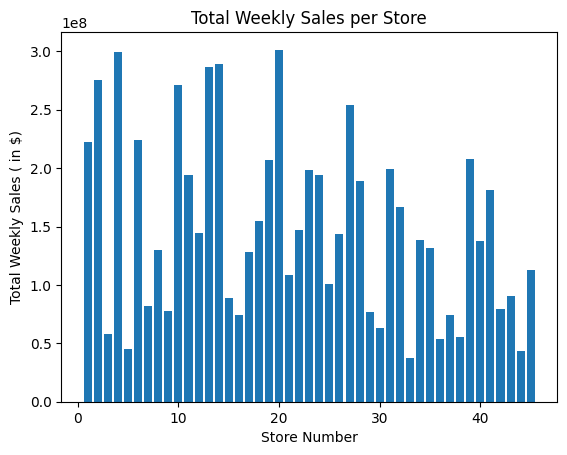

In [ ]:
# bar graph
plt.bar(data.index, data.values)
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales ( in $)')
plt.title('Total Weekly Sales per Store')
plt.show()


# Storewise std deviation , i.e. storewise sales variation.

In [ ]:
data_std = ds.groupby('Store').std()['Weekly_Sales'].sort_values(ascending=False)
data_std

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

* Store 14 has max st.deviation *

In [ ]:
# coeff. of variation = st. deviation/ mean

data_cv=ds.groupby('Store').std()['Weekly_Sales']/ ds.groupby("Store").mean()['Weekly_Sales']

data_cv=data_cv.reset_index().rename(columns ={"Weekly_Sales" : "Coeff. of Variation"})

data_cv

,Store,Coeff. of Variation
0,1,0.100292
1,2,0.123424
2,3,0.115021
3,4,0.127083
4,5,0.118668
5,6,0.135823
6,7,0.197305
7,8,0.116953
8,9,0.126895
9,10,0.159133


In [ ]:
# Max Coeff. Of Variation
data_cv.sort_values(by='Coeff. of Variation',ascending = False).head()

,Store,Coeff. of Variation
34,35,0.229681
6,7,0.197305
14,15,0.193384
28,29,0.183742
22,23,0.179721


* Store 35 has max Coeff. of Variation *

# Which store has good quaterly growth rate in Q3'2012

In [ ]:
# convert date col to datetime object
ds['Date']= pd.to_datetime(ds['Date'], format="%d-%m-%Y")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# extract the year and month

ds['Year']=pd.DatetimeIndex(ds['Date']).year
ds['Month']=pd.DatetimeIndex(ds['Date']).month
ds.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [ ]:
# quarter calculation
data_q3=ds[(ds['Month'].isin([6,7,8,9])) & (ds['Year']==2012)]
data_q3.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
121,1,2012-06-01,1624477.58,0,77.95,3.501,221.747214,7.143,2012,6
122,1,2012-06-08,1697230.96,0,78.30,3.452,221.749484,7.143,2012,6
123,1,2012-06-15,1630607.00,0,79.35,3.393,221.762642,7.143,2012,6
124,1,2012-06-22,1527845.81,0,78.39,3.346,221.803021,7.143,2012,6
125,1,2012-06-29,1540421.49,0,84.88,3.286,221.843400,7.143,2012,6


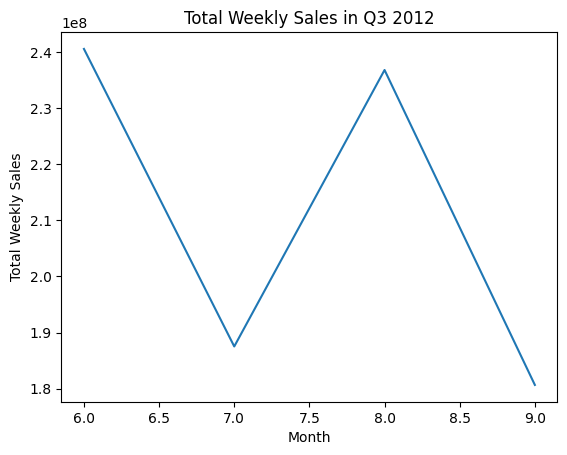

In [ ]:
# Monthly 3rd Quaterly Sales

data = data_q3.groupby('Month').sum()['Weekly_Sales']
plt.plot(data.index, data.values)
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales in Q3 2012')
plt.show()


*percentage change*

In [ ]:
# Growth rate by store so first recorded date of quarter 3 to last date

data_q3['Date'].iloc[0] , data_q3['Date'].iloc[-1]

(Timestamp('2012-06-01 00:00:00'), Timestamp('2012-09-28 00:00:00'))

In [ ]:
pc = data_q3[(data_q3['Date']=='2012-06-01') | (data_q3['Date']=='2012-09-28')]
pc

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
121,1,2012-06-01,1624477.58,0,77.95,3.501,221.747214,7.143,2012,6
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9
264,2,2012-06-01,1910092.37,0,78.38,3.501,221.385275,6.891,2012,6
281,2,2012-09-28,1746470.56,0,79.45,3.666,222.616433,6.565,2012,9
407,3,2012-06-01,432268.53,0,81.55,3.501,225.251831,6.664,2012,6
...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,577792.32,0,77.55,3.666,214.305250,9.285,2012,9
6270,44,2012-06-01,323410.94,0,61.11,3.788,130.959226,5.621,2012,6
6287,44,2012-09-28,355307.94,0,64.80,3.821,131.043000,5.407,2012,9
6413,45,2012-06-01,837144.63,0,74.48,3.742,191.009171,8.567,2012,6


In [ ]:
pct=pc.groupby('Store')['Weekly_Sales'].pct_change().dropna().reset_index().rename(columns={'index':'Store','Weekly_Sales':'%Change'})
pct

,Store,%Change
0,138,-0.115371
1,281,-0.085662
2,424,-0.098216
3,567,-0.069626
4,710,-0.138179
5,853,-0.185584
6,996,-0.121888
7,1139,-0.039555
8,1282,-0.115288
9,1425,-0.041081


In [ ]:
pct['Store']=pc['Store'].unique()
pct.head()

,Store,%Change
0,1,-0.115371
1,2,-0.085662
2,3,-0.098216
3,4,-0.069626
4,5,-0.138179


In [ ]:
# Top performing WM Stores during Q3 2012

pct.sort_values(by='%Change',ascending=False).head()

,Store,%Change
43,44,0.098627
16,17,0.036001
31,32,-0.000386
29,30,-0.003773
36,37,-0.007256


In [ ]:
# Decrease in weekly sales a lot during Q3 2012
pct.sort_values(by='%Change',ascending=False).tail()

,Store,%Change
28,29,-0.150243
14,15,-0.165774
5,6,-0.185584
26,27,-0.189384
13,14,-0.257125


*Store 17 and 44 were two WM Stores that increased their weekly sales during Q3 2012.*

#  Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [ ]:
# Creating Holiday Dataframe
holiday =ds[ds['Holiday_Flag']==1]
holiday.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2012,2
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684,2012,9


In [ ]:
# Holiday Dates
holiday['Date'].value_counts()

2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: Date, dtype: int64

In [ ]:
# Assigning Holiday Name to Each presented date to make it easier for comparison

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

from datetime import datetime
sb=[datetime.strptime(date,"%d-%b-%y").date() for date in '12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13'.split(", ")]
lbrd=[datetime.strptime(date,"%d-%b-%y").date() for date in '10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13'.split(", ")]
thnkg=[datetime.strptime(date,"%d-%b-%y").date() for date in '26-Nov-19, 25-Nov-11, 23-Nov-12, 29-Nov-13'.split(", ")]
chrd=[datetime.strptime(date,"%d-%b-%y").date() for date in '31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13'.split(", ")]

def assign_holiday(date):
  if date in sb:
    return 'Super Bowl'
  elif date in lbrd:
    return 'Labour Day'
  elif date in thnkg:
    return 'Thanksgiving'
  elif date in chrd:
    return 'Christmas'
  else:
    return 'Not Holiday'

holiday["Occasion"] = holiday['Date'].apply(lambda date: assign_holiday(date))
holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Occasion
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Super Bowl
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,Labour Day
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,Not Holiday
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,Christmas
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,Super Bowl


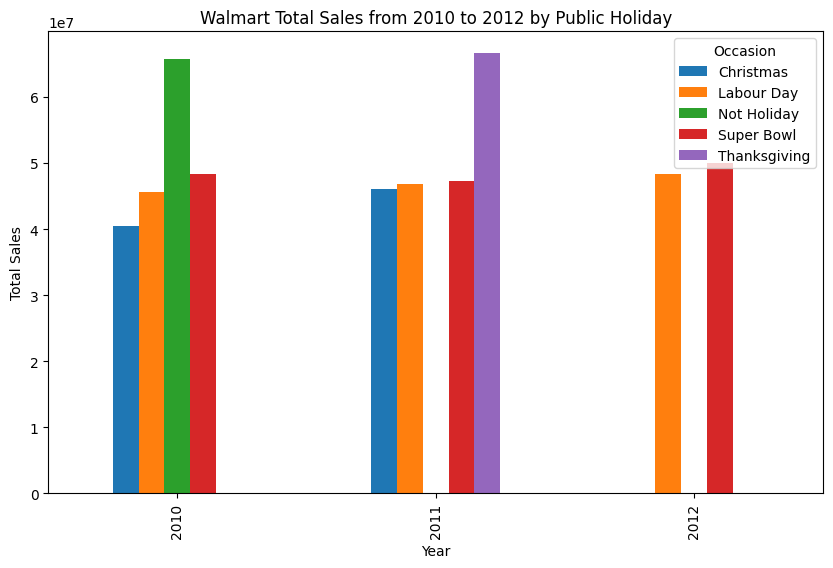

In [ ]:

# Group data by year and occasion
holiday_year = holiday.groupby(['Year', 'Occasion']).sum().reset_index()

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data as grouped bars
holiday_year.pivot(index='Year', columns='Occasion', values='Weekly_Sales').plot(kind='bar', ax=ax)

# Set title and axis labels
ax.set_title('Walmart Total Sales from 2010 to 2012 by Public Holiday')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')

# Display plot
plt.show()


In [ ]:
# Mean sales in non-holiday season for all stores together

non_holiday_mean_sales = ds[ds['Holiday_Flag']==0]['Weekly_Sales'].mean()
non_holiday_mean_sales/10**6

1.0412563802088555

In [ ]:
# Holiday Sales that is greater than mean
holiday.groupby('Occasion')['Weekly_Sales'].mean()/10**6

Occasion
Christmas       0.960833
Labour Day      1.042427
Not Holiday     1.462689
Super Bowl      1.079128
Thanksgiving    1.479858
Name: Weekly_Sales, dtype: float64

# Provide a monthly and semester view of sales in units and give insights



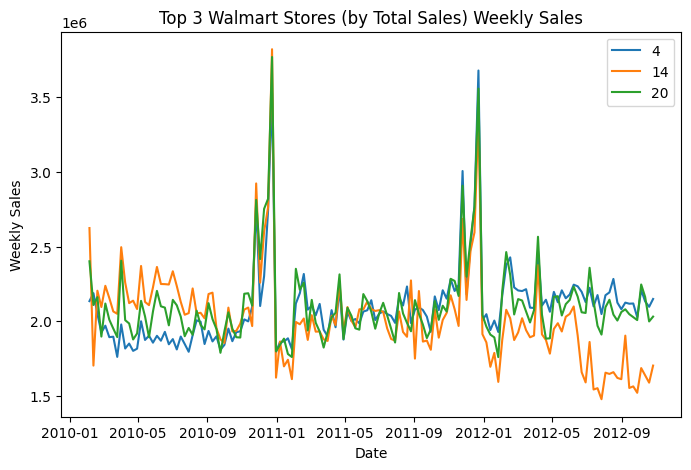

In [ ]:

sales=ds.groupby('Store').sum().sort_values(by='Weekly_Sales',ascending=False).iloc[:3].index.to_list()
wm_top_stores = ds[ds['Store'].isin(sales)]

fig,ax=plt.subplots(figsize=(8,5))

for store,data in wm_top_stores.groupby('Store'):
  ax.plot(data['Date'],data['Weekly_Sales'],label=store)

# plot properties
ax.set_title('Top 3 Walmart Stores (by Total Sales) Weekly Sales')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
ax.legend()
plt.show()


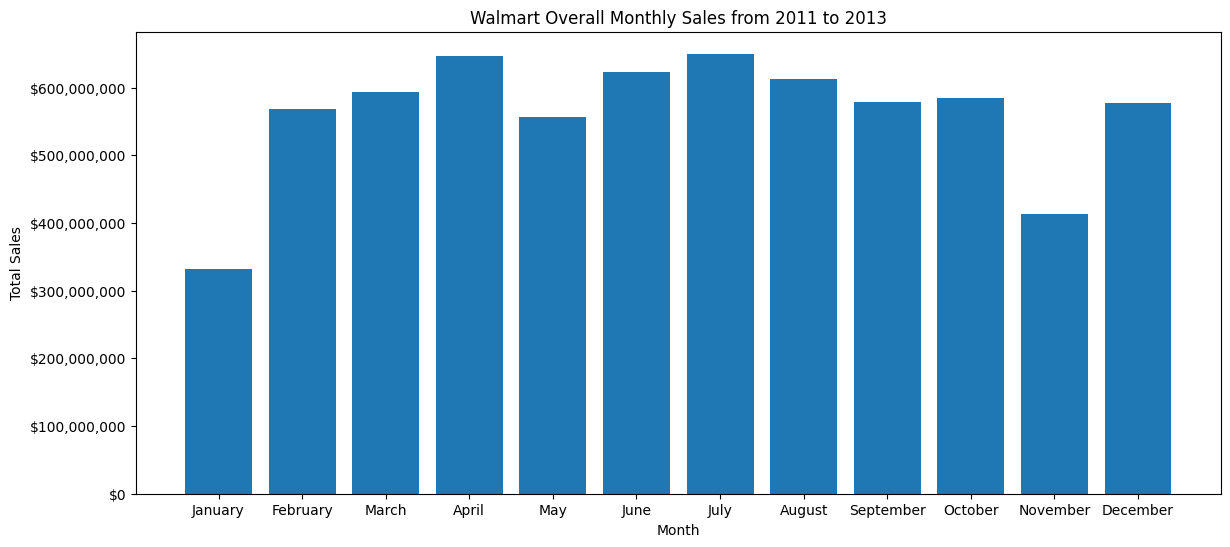

In [ ]:
# Monthly Sales
import calendar

monthly_sales = ds.groupby("Month")['Weekly_Sales'].sum()
months = [calendar.month_name[n] for n in range(1,13)]

fig ,ax = plt.subplots(figsize=(14,6))
ax.bar(months, monthly_sales)
ax.set(title='Walmart Overall Monthly Sales from 2011 to 2013', ylabel='Total Sales',xlabel='Month')
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()

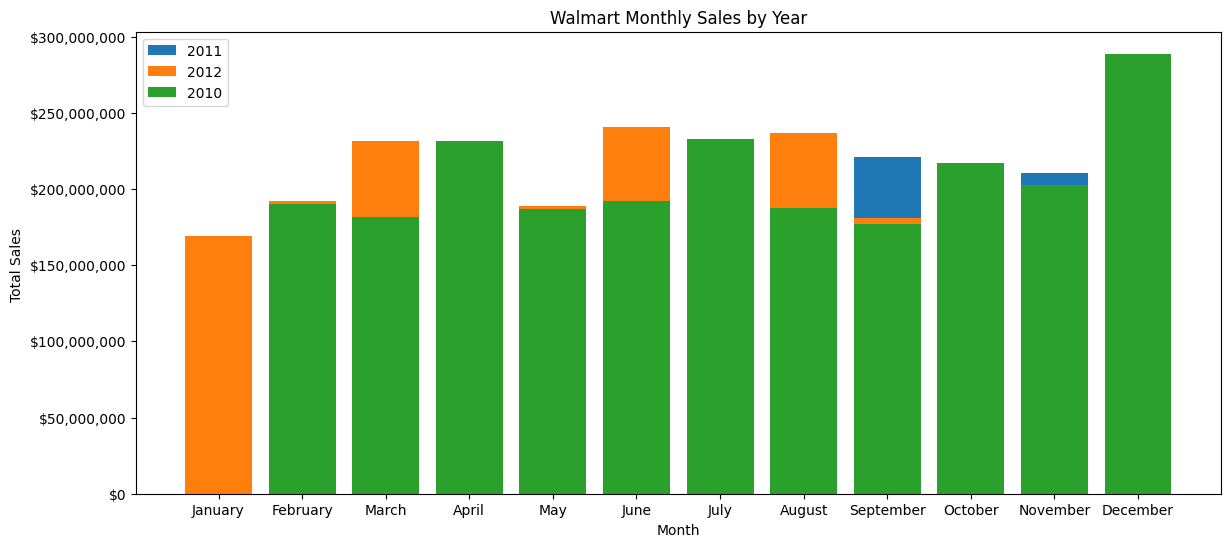

In [ ]:

import calendar

monthly_sales = ds.groupby(['Month', 'Year'])['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    ax.bar(data['Month'], data['Weekly_Sales'], label=str(year))

ax.set(title='Walmart Monthly Sales by Year',
       ylabel='Total Sales ',
       xlabel='Month')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.legend()
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[n] for n in range(1, 13)])
plt.show()


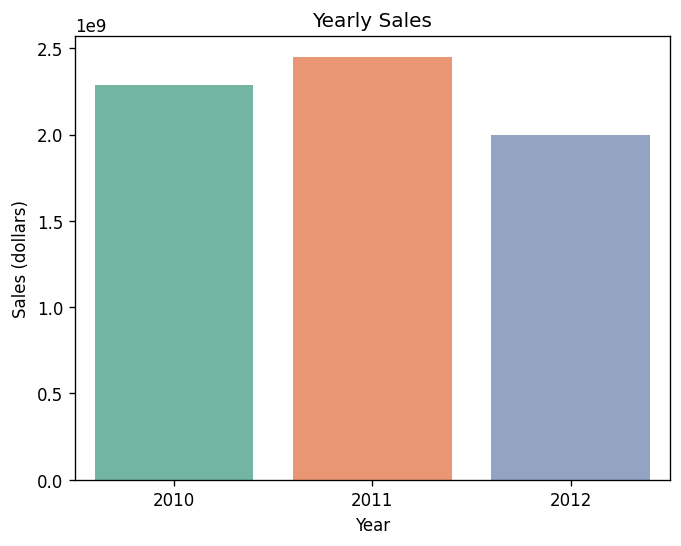

In [ ]:
# By Year Sales
yearly_sales = ds.groupby('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(dpi=120)
sns.barplot(data=yearly_sales, x='Year', y='Weekly_Sales', palette='Set2')
plt.title("Yearly Sales")
plt.ylabel("Sales (dollars)")
plt.show()

# Statistical Model

* Building prediction models to forecast demand (Linear Regression - Utilize variables like date and restructure dates as 1 for 5 feb 2010. Hypothesize if CPI, unemployement, and fuel price have any impact on sales.) Change dates into days by creating new varibales. Select model whic gives best accuracy. *

In [ ]:
# Adding more columns

ds['Day']=pd.DatetimeIndex(ds['Date']).day
ds['Holiday'] = ds['Date'].apply(lambda date: assign_holiday(date))

ds.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Not Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Not Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Not Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Not Holiday


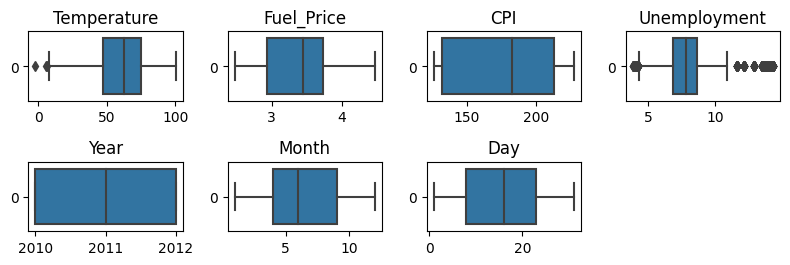

In [ ]:
# Checking for outlier and NaN values

features_list = 'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day'.split(", ")

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 3), dpi=100)

for ax, feature in zip(axes.flatten(), features_list):
    sns.boxplot(ds[feature], orient='h', ax=ax)
    ax.set(title=f'{feature}')

for i in range(len(features_list), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Removing Outlier

def remove_out(feature):

    p25 = ds[feature].quantile(0.25)
    p75 = ds[feature].quantile(0.75)
    iqr = p75 - p25

    upper_limit = p75 + 1.5 * iqr
    lower_limit = p25 - 1.5 * iqr

    new_df = ds[(ds[feature] > lower_limit) & (ds[feature] < upper_limit)]

    return new_df

for feature in features_list:
    ds = remove_out(feature)
ds.shape


(5951, 12)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ds['Holiday'] = ordinal_encoder.fit_transform(ds[['Holiday']])

print(ordinal_encoder.categories_)

[array(['Christmas', 'Labour Day', 'Not Holiday', 'Super Bowl',
       'Thanksgiving'], dtype=object)]


In [ ]:
ds.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,3.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2.0


In [ ]:
corr_matrix = ds.corr()
corr_matrix['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Month           0.074373
Holiday         0.046274
Holiday_Flag    0.036672
Fuel_Price      0.011150
Day            -0.015058
Year           -0.034154
Temperature    -0.062210
Unemployment   -0.074868
CPI            -0.087470
Store          -0.322210
Name: Weekly_Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

features =  'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Holiday'.split(", ")
target= 'Weekly_Sales'

X = ds[features]
Y = ds[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

prediction = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = np.sqrt(mean_squared_error(Y_test, prediction))
print("RSME:", lin_rmse)
print("Score:", lin_reg.score(X_train, Y_train) * 100,"%")

RSME: 553446.998403573
Score: 2.9853503737731213 %


<Axes: ylabel='Weekly_Sales'>

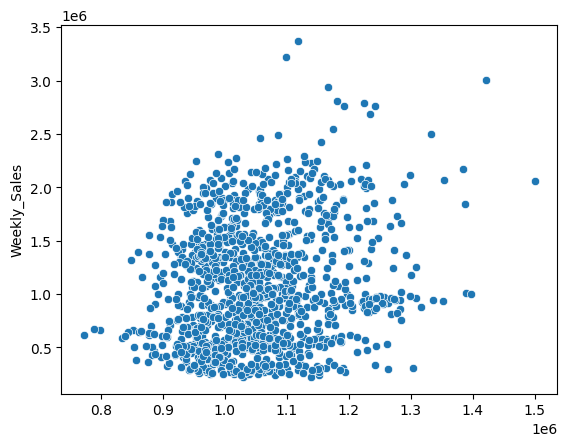

In [ ]:
sns.scatterplot(x=prediction, y=Y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

tree_prediction = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(Y_test, tree_prediction))
print("RMSE:",tree_rmse)
print("Score:", tree_reg.score(X_train, Y_train) * 100, "%")

RMSE: 661464.7279583163
Score: 87.15746885231765 %


<Axes: ylabel='Weekly_Sales'>

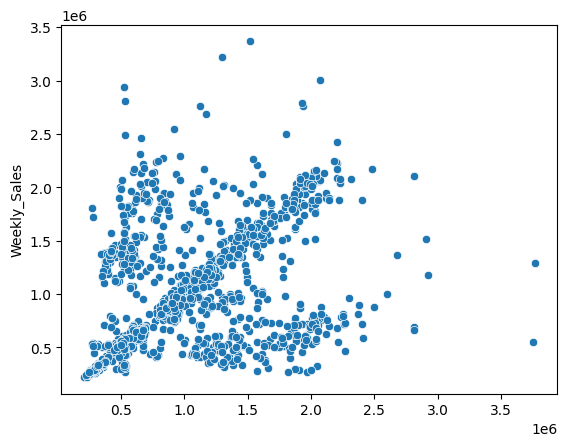

In [ ]:
sns.scatterplot(x=tree_prediction, y=Y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

forest_prediction = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(Y_test, forest_prediction))
print("RMSE:",forest_rmse)
print("Score:", forest_reg.score(X_train, Y_train) * 100, "%")

RMSE: 543430.564801551
Score: 79.33772276068474 %


<Axes: ylabel='Weekly_Sales'>

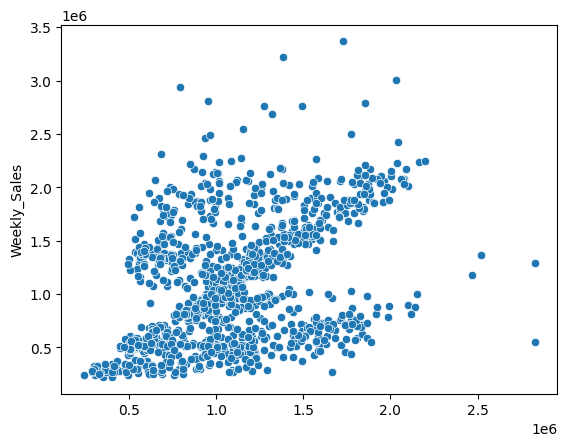

In [ ]:
sns.scatterplot(x=forest_prediction, y=Y_test)